# Integración features con minutos jugados y filtro de jugadores con minutos jugados > 600 + EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\DELUX\Desktop\publicaciones\1_DataScoutingClustering\1_MedioCentroCreativo\df\feat.csv',decimal=',')

In [3]:
df.head()

,id_jugador,jugador,equipo,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11
0,7261,Daniele Bonera,Villarreal,1.931330,0.000000,0.903226,0.000000,0.000000,0.386266,0.000000,0.000000,0.0,13.133047,0.098361
1,10316,Joaquín Sánchez Rodríguez,Real Betis,2.284534,0.265643,0.847518,2.550177,1.381346,1.646989,2.337662,6.216057,0.0,3.187721,0.316154
2,11129,David López,Espanyol,3.807692,0.049451,0.883181,0.296703,0.148352,0.296703,0.197802,0.791209,0.0,12.956044,0.164928
3,11602,Borja Fernández,Real Valladolid,2.681764,0.000000,0.788918,0.107271,0.000000,0.750894,0.107271,0.643623,0.0,7.401669,0.229846
4,14028,Juan José Camacho Barnola,Huesca,0.000000,0.000000,0.545455,5.294118,0.000000,2.647059,2.647059,2.647059,0.0,0.000000,0.155556


In [4]:
dataAggJug = pd.read_csv(r'C:\Users\DELUX\Desktop\consultoria_futbol\comparativoJugadores\dataAggJug.csv')

In [5]:
minJug = dataAggJug[dataAggJug['estadistica']=='mins_played']

In [6]:
minJug = minJug.drop('estadistica',1).rename(columns={'num_estadistica':'minJug'})

In [7]:
minJug = minJug.groupby(['id_jugador','jugador']).sum().reset_index().drop('fecha',1)

In [8]:
minJug.head()

,id_jugador,jugador,minJug
0,7261,Daniele Bonera,233
1,10316,Joaquín Sánchez Rodríguez,1694
2,11129,David López,1820
3,11602,Borja Fernández,839
4,14028,Juan José Camacho Barnola,34


In [9]:
minJug['id_jugador'] = minJug['id_jugador'].astype(int)
df['id_jugador'] = df['id_jugador'].astype(int)

In [10]:
df = df.merge(minJug,on=['id_jugador','jugador'],how='left')

In [11]:
df.head()

,id_jugador,jugador,equipo,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,minJug
0,7261,Daniele Bonera,Villarreal,1.931330,0.000000,0.903226,0.000000,0.000000,0.386266,0.000000,0.000000,0.0,13.133047,0.098361,233
1,10316,Joaquín Sánchez Rodríguez,Real Betis,2.284534,0.265643,0.847518,2.550177,1.381346,1.646989,2.337662,6.216057,0.0,3.187721,0.316154,1694
2,11129,David López,Espanyol,3.807692,0.049451,0.883181,0.296703,0.148352,0.296703,0.197802,0.791209,0.0,12.956044,0.164928,1820
3,11602,Borja Fernández,Real Valladolid,2.681764,0.000000,0.788918,0.107271,0.000000,0.750894,0.107271,0.643623,0.0,7.401669,0.229846,839
4,14028,Juan José Camacho Barnola,Huesca,0.000000,0.000000,0.545455,5.294118,0.000000,2.647059,2.647059,2.647059,0.0,0.000000,0.155556,34


In [12]:
len(df)

517

In [13]:
df.isnull().sum()

id_jugador    0
jugador       0
equipo        0
feat1         0
feat2         0
feat3         0
feat4         0
feat5         0
feat6         0
feat7         0
feat8         0
feat9         0
feat10        0
feat11        0
minJug        0
dtype: int64

In [14]:
df = df[df['minJug']>600]

In [15]:
len(df)

360

In [16]:
df.describe()

,id_jugador,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,feat11,minJug
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,118987.508333,2.754132,0.154759,0.770757,0.887020,0.786081,1.298568,0.777993,2.756160,0.051358,5.822129,0.227682,1931.908333
std,80404.245406,1.760665,0.151937,0.097245,0.848266,0.800222,0.946380,0.632398,2.242642,0.089612,4.041642,0.135112,749.261032
min,10316.000000,0.142405,0.000000,0.404050,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140845,0.000000,608.000000
25%,59944.750000,1.465553,0.034276,0.728040,0.288616,0.136574,0.497816,0.221977,0.938385,0.000000,2.522487,0.104647,1361.000000
50%,92122.500000,2.431690,0.128312,0.785106,0.668585,0.579111,1.155876,0.669634,2.500000,0.000000,4.704807,0.267989,1895.500000
75%,168728.750000,3.584059,0.234124,0.840664,1.303867,1.206020,2.024843,1.195390,3.982565,0.079184,8.686109,0.335289,2588.250000
max,472145.000000,9.704881,1.030043,0.944820,6.180258,4.420601,4.242658,3.022140,13.692552,1.029520,19.535166,0.525424,3420.000000


In [17]:
df['id_jugador'] = df['id_jugador'].astype('str')

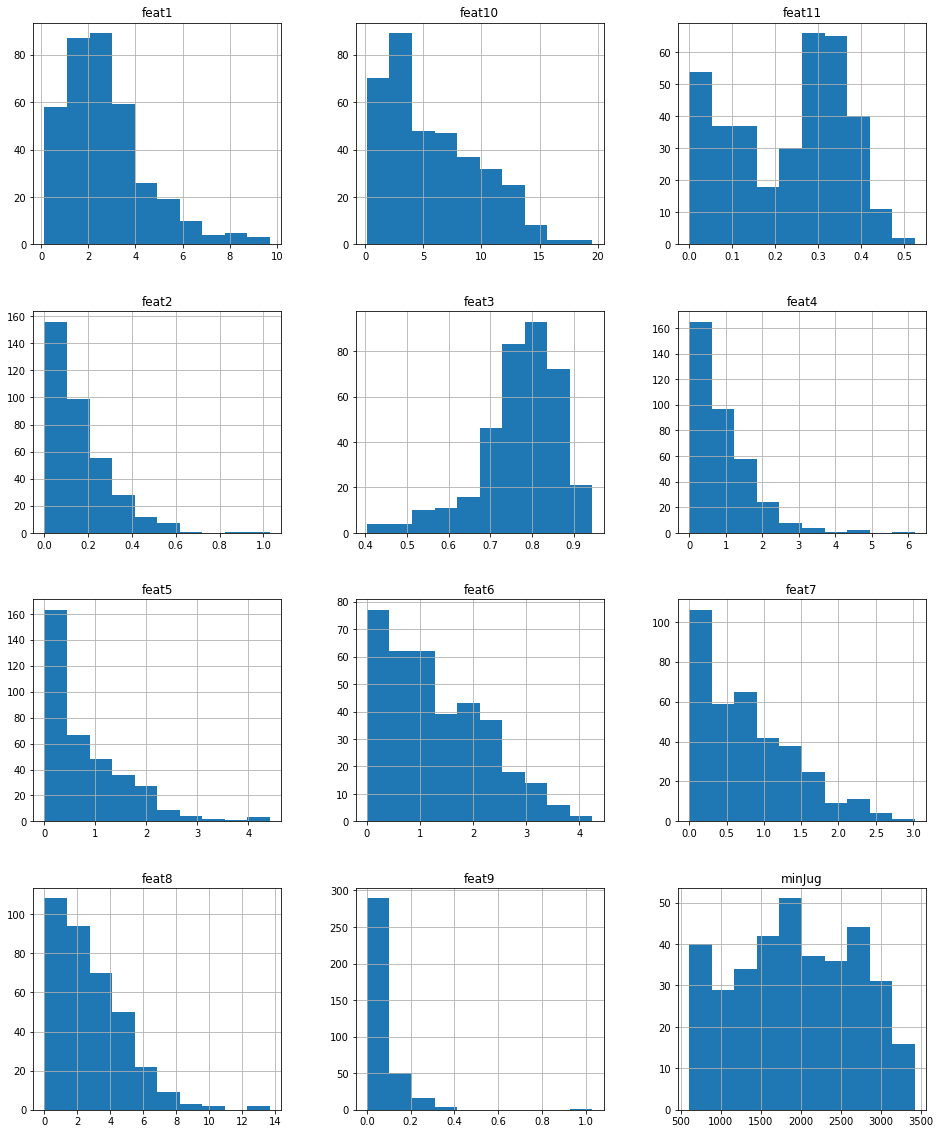

In [18]:
df.hist(figsize=(16,20));

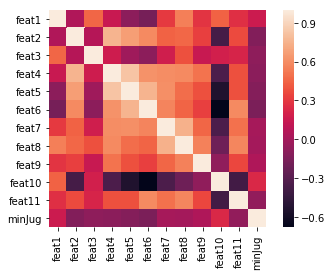

In [19]:
corrmat = df.corr()
f, ax = plt.subplots()
sbn.heatmap(corrmat, vmax=1, square=True);

In [20]:
df_num = df.select_dtypes([np.number])

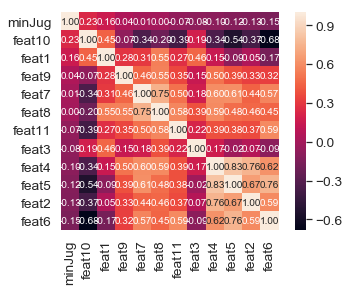

In [22]:
k = 12 
cols = corrmat.nlargest(k, 'minJug')['minJug'].index
cm = np.corrcoef(df[cols].values.T)
sbn.set(font_scale=1.25)
hm = sbn.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [23]:
cd C:\Users\DELUX\Desktop\publicaciones\1_DataScoutingClustering\1_MedioCentroCreativo\df

C:\Users\DELUX\Desktop\publicaciones\1_DataScoutingClustering\1_MedioCentroCreativo\df


In [24]:
df.to_csv('df.csv',encoding='utf-8', index=False,decimal=',')